In [0]:
# # increase memory to 25 GB
# a = []
# while(1):
#   a.append(1)

In [1]:
# required just in Google Colab to explicitly use tensorflow 1
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import pickle
import numpy as np
import os
from os.path import isfile, isdir
import cifar10_utils
import alexNet
import cv2
import matplotlib.pyplot as plt
import skimage

%load_ext autoreload
%autoreload 2

In [0]:
cifar10_folder_path = os.getcwd()+'/datasets'+ '/cifar-10-batches-py'
model_loc = os.getcwd() + '/saved_models'
datasets_path = os.getcwd()+'/datasets'

if not isdir(datasets_path):
    os.mkdir(datasets_path)

if not isdir(model_loc):
    os.mkdir(model_loc)

In [0]:
param_list = {
    'epochs': 15,
    'batch_size': 64,
    'learning_rate': 5e-5,
    # by default, AlexNet here is run on CPU; for GPU there can be single or multi-GPU mode - code is being
    # written only for single GPU here
    'gpu_mode': None,
    # can run on many datasets like MNIST, cifar10, cifar100, imagenet, etc.
    'dataset': 'cifar10',
    # indicates for how many epochs successively the training loss must be tracked to trigger early stopping
    'successive_impr': 2
}

In [5]:
  # 1. download the dataset
  cifar10_utils.download_data(cifar10_folder_path, datasets_path)
  
  # 2. do data preprocessing
  attributes = {
      'img_width': 32, 
      'img_height': 32, 
      'num_channels': 3,
      'num_classes':10,
      'training_batches_given': 5,

      # total training samples were 50000 - 10 % has been taken out as validation set - so change the following values accordingly 
      'validation_data_percentage': 10,
      'training_samples': 45000,
      'validation_samples': 5000,
      'testing_samples': 10000,
      'per_data_batch_samples': 10000
  }
  


Zipped dataset already exists in the system
Extracted cifar-10-dataset already exists


In [0]:
  cifar10_utils.preprocessing(cifar10_folder_path, attributes)

In [7]:
# the following few cells are being written to test the effect of skimage.transforms.resize()
f, l = pickle.load(open('preprocessed_training_batch_1.p', mode = "rb"))
f[12]

array([[[164, 215, 244],
        [162, 212, 240],
        [162, 212, 240],
        ...,
        [157, 210, 237],
        [153, 208, 235],
        [153, 203, 234]],

       [[168, 218, 245],
        [166, 215, 242],
        [166, 215, 242],
        ...,
        [164, 212, 238],
        [160, 209, 236],
        [158, 205, 235]],

       [[172, 220, 246],
        [170, 217, 243],
        [171, 218, 244],
        ...,
        [168, 212, 238],
        [165, 208, 235],
        [163, 207, 236]],

       ...,

       [[123, 160, 105],
        [117, 154, 102],
        [112, 149,  99],
        ...,
        [117, 136, 100],
        [ 95, 115,  79],
        [120, 149, 100]],

       [[120, 156, 100],
        [116, 151,  99],
        [112, 147,  96],
        ...,
        [126, 149, 110],
        [120, 144, 103],
        [120, 152, 101]],

       [[121, 154,  96],
        [120, 152,  99],
        [116, 148,  97],
        ...,
        [124, 152, 108],
        [124, 154, 107],
        [120, 154, 100]]

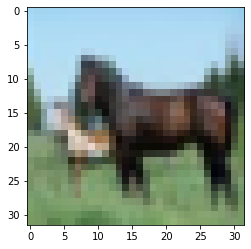

In [8]:
plt.imshow(f[12])

In [9]:
f[12].nbytes

3072

In [10]:
new_img = skimage.transform.resize(f[12], (227, 227), mode="constant")
new_img

array([[[0.20931073, 0.27440126, 0.31141352],
        [0.2610323 , 0.34220698, 0.38836513],
        [0.31275387, 0.41001269, 0.46531673],
        ...,
        [0.29177648, 0.38712826, 0.44624637],
        [0.24352404, 0.32310705, 0.37244852],
        [0.19527159, 0.25908584, 0.29865067]],

       [[0.2610323 , 0.34220698, 0.38836513],
        [0.32553449, 0.42676777, 0.4843318 ],
        [0.39003668, 0.51132857, 0.58029847],
        ...,
        [0.36387568, 0.4827893 , 0.55651575],
        [0.30369986, 0.40294818, 0.46448214],
        [0.24352404, 0.32310705, 0.37244852]],

       [[0.31275387, 0.41001269, 0.46531673],
        [0.39003668, 0.51132857, 0.58029847],
        [0.46731949, 0.61264445, 0.69528021],
        ...,
        [0.43597489, 0.57845034, 0.66678512],
        [0.36387568, 0.4827893 , 0.55651575],
        [0.29177648, 0.38712826, 0.44624637]],

       ...,

       [[0.23075133, 0.29368351, 0.18307544],
        [0.28777096, 0.36625395, 0.22831415],
        [0.3447906 , 0

In [11]:
new_img.nbytes

1236696

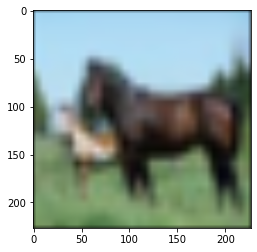

In [12]:
plt.imshow(new_img)

In [13]:
from skimage.util import img_as_ubyte
new_img = img_as_ubyte(new_img)
new_img

array([[[ 53,  70,  79],
        [ 67,  87,  99],
        [ 80, 105, 119],
        ...,
        [ 74,  99, 114],
        [ 62,  82,  95],
        [ 50,  66,  76]],

       [[ 67,  87,  99],
        [ 83, 109, 124],
        [ 99, 130, 148],
        ...,
        [ 93, 123, 142],
        [ 77, 103, 118],
        [ 62,  82,  95]],

       [[ 80, 105, 119],
        [ 99, 130, 148],
        [119, 156, 177],
        ...,
        [111, 148, 170],
        [ 93, 123, 142],
        [ 74,  99, 114]],

       ...,

       [[ 59,  75,  47],
        [ 73,  93,  58],
        [ 88, 112,  70],
        ...,
        [ 87, 112,  73],
        [ 73,  93,  61],
        [ 58,  75,  49]],

       [[ 49,  63,  39],
        [ 61,  78,  49],
        [ 73,  93,  58],
        ...,
        [ 73,  93,  61],
        [ 61,  78,  51],
        [ 49,  63,  41]],

       [[ 39,  50,  31],
        [ 49,  63,  39],
        [ 59,  75,  47],
        ...,
        [ 58,  75,  49],
        [ 49,  63,  41],
        [ 39,  50,  33]]

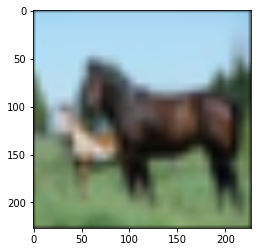

In [14]:
plt.imshow(new_img)

In [15]:
new_img.nbytes

154587

In [0]:
  # # 3. load validation data
  prep_validation_set = cifar10_utils.load_resized_and_preprocessed_validation_set()
  
  # data augmentation as suggested in AlexNet has not been done here due to resource constraints

In [17]:
net = alexNet.AlexNet(param_list, attributes)


Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [18]:
print('Training on 45000 samples and validating on 5000 samples')
training_results = net.train(param_list, prep_validation_set, attributes, model_loc)
pickle.dump(training_results, open('training_results.p', 'wb'))

Training on 45000 samples and validating on 5000 samples
Start training.....

Initializing the variables......

Batch 1 / 5
Batch avg loss: 3.205710996127298, Batch avg acc: 0.15077570926213096
Batch 2 / 5
Batch avg loss: 2.1157409679805133, Batch avg acc: 0.27147606374524164
Batch 3 / 5
Batch avg loss: 1.7952695154974647, Batch avg acc: 0.3493572695458189
Batch 4 / 5
Batch avg loss: 1.6440280785797337, Batch avg acc: 0.39507978731858817
Batch 5 / 5
Batch avg loss: 1.553048885460441, Batch avg acc: 0.4302748226104899
Epoch 1/15, Runtime: 560.1s ===> train_loss: 2.0627596887290904 - train_acc: 0.31939273049645395 - val_loss: 1.5200573281396794 - val_acc: 0.44363132911392406
Batch 1 / 5
Batch avg loss: 1.435195524641808, Batch avg acc: 0.47103280124934854
Batch 2 / 5
Batch avg loss: 1.3863283581767523, Batch avg acc: 0.49288563821332676
Batch 3 / 5
Batch avg loss: 1.2703289309291974, Batch avg acc: 0.538519503377008
Batch 4 / 5
Batch avg loss: 1.2240311418864744, Batch avg acc: 0.5614140

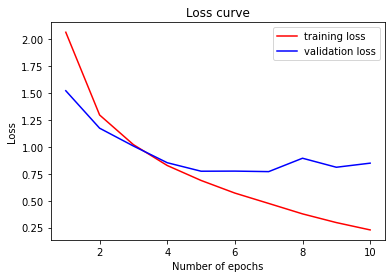

In [24]:
# plot the training results
import matplotlib.pyplot as plt

epoch_axis = [i+1 for i in range(len(training_results['train_loss']))]
train_loss_axis = training_results['train_loss']
val_loss_axis = training_results['val_loss']
plt.title('Loss curve')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.plot(epoch_axis, train_loss_axis, 'r-', label = 'training loss')
plt.plot(epoch_axis, val_loss_axis, 'b-', label = 'validation loss')
plt.legend(loc="upper right")
plt.savefig('loss curve for CIFAR-10.png')
plt.show()

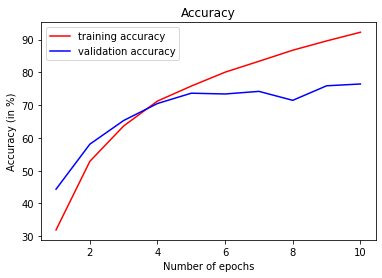

In [30]:
train_acc_axis = training_results['train_acc']
val_acc_axis = training_results['val_acc']
train_acc_axis = [acc*100 for acc in train_acc_axis]
val_acc_axis = [acc*100 for acc in val_acc_axis]
plt.title('Accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy (in %)')
plt.plot(epoch_axis, train_acc_axis, 'r-', label = 'training accuracy')
plt.plot(epoch_axis, val_acc_axis, 'b-', label = 'validation accuracy')
plt.legend(loc="upper left")
plt.savefig('accuracy curve for CIFAR-10.png')
plt.show()


INFO:tensorflow:Restoring parameters from /content/saved_models
Test accuracy: 0.7603503184713376
k random preds: 
[[4.3796667e-01 5.9688839e-05 1.2578333e-02 8.9890145e-02 6.4651383e-04
  2.5524816e-01 1.9699732e-04 2.0318532e-01 2.3653085e-05 2.0450626e-04]
 [1.4364755e-07 8.6207081e-08 9.6173198e-07 3.6950444e-06 1.2402767e-05
  9.4546958e-06 2.5694348e-07 9.9996972e-01 9.9277500e-08 3.2494536e-06]
 [8.3923180e-05 5.1815255e-04 1.4973272e-01 4.4763812e-01 4.8414837e-03
  8.4322870e-02 4.6945125e-02 1.0707494e-03 4.7764546e-04 2.6436919e-01]
 [1.2171956e-02 8.0060118e-01 7.7927712e-04 4.0625767e-03 7.2478528e-05
  1.8833911e-02 6.0861115e-03 3.6915044e-05 1.1261408e-01 4.4741619e-02]
 [5.6644651e-05 4.3213369e-08 9.9978954e-01 1.0081335e-04 2.6300979e-06
  1.7561206e-05 3.8697449e-06 2.8230545e-05 1.1029402e-08 5.3554942e-07]
 [4.2723090e-04 8.3586303e-05 1.3094912e-03 5.0320017e-01 3.8984006e-03
  1.0717738e-01 6.2510627e-04 3.8286924e-01 1.2930076e-05 3.9641632e-04]
 [7.9404415e-0

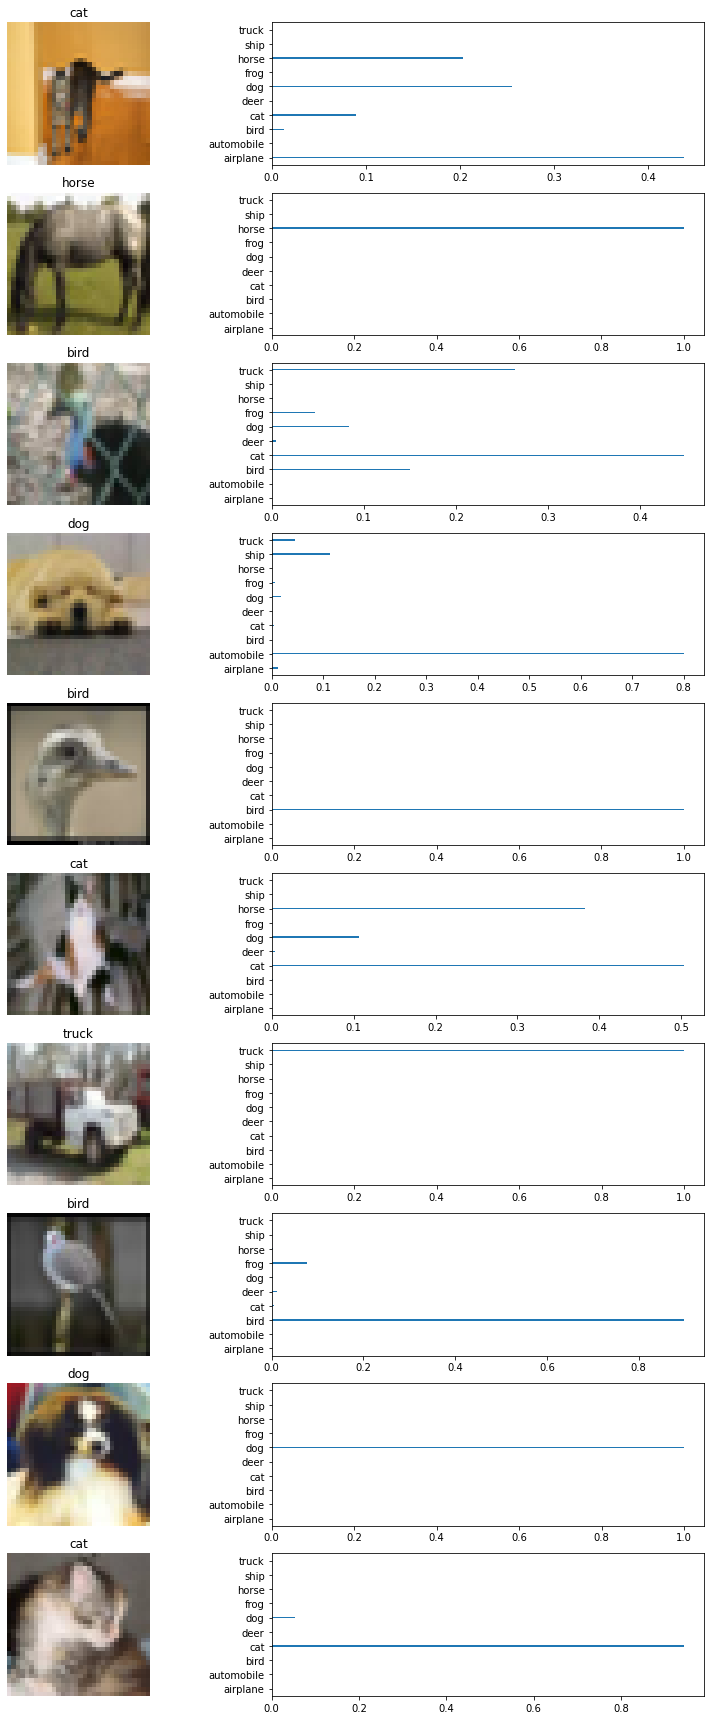

In [31]:
# testing may be done in two ways - 
#   1. for a single given image - we can specify the image as the second last argument (default is None) and its actual class by last argument
#   2. for a batch (selected or completely random) of images from the test set (if entire test set has to be run, along with a few random test preds to be shown, then keep it at default (no need to specify in function call), else if we want to run preds on any k random test images, then specify it)

# default setting: to run testing on the entire dataset and then 10 random predictions on the test data to show the results of
net.testing(param_list, attributes, cifar10_folder_path, model_loc)

# to do:
# - done:     add the weight_initializer as random normal again to see if training is still the same
# - done:     add the timer codes
# - do normalization and mean-centering, but save array with img_as_ubyte() - not done because one - we might get negative pixels....also transform.resize() already does a mean centering
# - done:     if val_acc is very less than training acc for sucessive epochs then stop training


INFO:tensorflow:Restoring parameters from /content/saved_models
label_ids
Image [0]==> Ground truth: horse; Prediction: horse; Match found: True


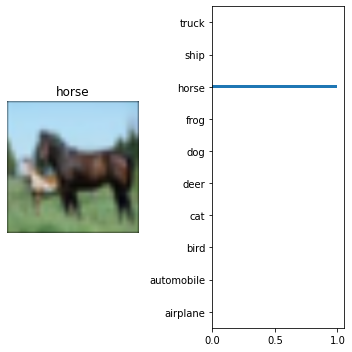

In [33]:
# check results for a single image, ex - the horse picture loaded before
net.testing(param_list, attributes, cifar10_folder_path, model_loc, given_image=f[12], actual_class=l[12])